In [1]:
import pandas as pd
import numpy as np
import string
import re
from datetime import date

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
pets = pd.read_csv('pets.csv', index_col = "ID")
pets['PublishDate'] = pd.to_datetime(pets['PublishDate'])

In [3]:
pets.head()

,Name,Organization,Text,Gender,Age,Size,City,State,Zip,PublishDate,Coat,PrimaryBreed,SecondaryBreed,MixedBreed,GoodWith,Attributes,SpecialNeeds,AdoptionFee
ID,,,,,,,,,,,,,,,,,,
42351895,Brody,SNARR Northeast,Say hello to your new best buddy Brody! This s...,Male,Puppy,Medium,White Plains,NY,10602,2018-08-01 08:48:26,Short,Beagle,Plott Hound,True,"['', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,450.0
42313510,Calliope,SNARR Northeast,Calliope is a very seeet dog who was given up ...,Female,Adult,Large,White Plains,NY,10602,2018-07-28 00:09:16,Short,Bloodhound,NaN,False,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,NaN
42301355,Oreo,SNARR Northeast,Meet Oreo! This cutie pie is looking for the p...,Male,Young,Small,White Plains,NY,10602,2018-07-27 02:24:15,Medium,Shih Tzu,NaN,True,"['', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,375.0
42301336,B-52,SNARR Northeast,Meet darling B-52! This handsome lovebug is re...,Male,Puppy,Medium,White Plains,NY,10602,2018-07-27 02:00:45,Short,Border Collie,Boxer,True,"['Children', 'Other Dogs', '']","['Spay/Neuter', 'Shots Current']",NaN,450.0
42301298,Tanqueray and Tequila (bonded pair),SNARR Northeast,Tanqueray and Tequila are a cutie pie brother-...,Female,Adult,Medium,White Plains,NY,10602,2018-07-27 01:44:44,Short,Pomeranian,Beagle,True,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,300.0


***ANALYSIS***  
2. Look at data, create lists of most popular breeds, sizes
    - histograms of ages, post date
    - bar graphs of breeds, locations, sizes, health, other attributes
3. size vs. urban/suburban locations
4. Statistics:
    - which dogs get adopted faster?  (Breed, Size, Age, Coat)
    - which shelters have most adoptions??
5. Word cloud from all stories for each breed (top breeds)


In [4]:
topbreeds = pets['PrimaryBreed'].value_counts()[0:15]
topbreeds.index

Index(['Pit Bull Terrier', 'Labrador Retriever', 'Chihuahua', 'Hound',
       'Terrier', 'American Staffordshire Terrier', 'Shepherd', 'Boxer',
       'German Shepherd Dog', 'Beagle', 'Mixed Breed', 'American Bulldog',
       'Dachshund', 'Shih Tzu', 'Border Collie'],
      dtype='object')

In [5]:
pets['SecondaryBreed'].value_counts().head(15)

Labrador Retriever                307
Mixed Breed                       295
Hound                             288
Terrier                           254
Pit Bull Terrier                  246
Shepherd                          134
Chihuahua                          95
Boxer                              94
Beagle                             87
Dachshund                          76
American Staffordshire Terrier     64
Border Collie                      53
American Bulldog                   53
Poodle                             46
German Shepherd Dog                40
Name: SecondaryBreed, dtype: int64

In [6]:
#most popular purebred dogs
pets.loc[pets['MixedBreed']==0].loc[pets['PrimaryBreed']!='Mixed Breed']['PrimaryBreed'].value_counts().head()
top_purebreds = list(pets.loc[pets['MixedBreed']==0].loc[pets['PrimaryBreed']!='Mixed Breed']['PrimaryBreed'].value_counts()[0:19].index)
#top_purebreds

#use this list to sort descriptions & make word clouds

In [7]:
pets['City'].value_counts().head(10)

New York        709
Flushing        194
Freeport        179
Rockaway        145
Brooklyn        141
Feasterville    133
North Wales     115
Lambertville    110
Wantagh         110
Yardley          94
Name: City, dtype: int64

In [8]:
Bronx = (10453, 10457, 10460, 10458, 10467, 10468, 10451, 10452, 10456,10454, 10455, 10459, 10474, \
         10463, 10471, 10466, 10469, 10470, 10475,10461,10462,10464, 10465, 10472, 10473)
Brooklyn = (11212, 11213, 11216, 11233, 11238, 11209, 11214, 11228,11204, 11218, 11219, 11230,11234, \
            11236, 11239, 11223, 11224, 11229, 11235,11201, 11205, 11215, 11217, 11231, 11203, 11210, \
            11225, 11226, 11207, 11208,11211, 11222,11220, 11232,11206, 11221, 11237)
Manhattan = (10026, 10027, 10030, 10037, 10039, 10001, 10011, 10018, 10019, 10020, 10036, 10029, 10035, \
             10010, 10016, 10017, 10022, 10012, 10013, 10014, 10004, 10005, 10006, 10007, 10038, 10280, \
             10002, 10003, 10009, 10021, 10028, 10044, 10065, 10075, 10128, 10023, 10024, 10025, 10031, \
             10032, 10033, 10034, 10040)
Queens = (11361, 11362, 11363, 11364,11354, 11355, 11356, 11357, 11358, 11359, 11360, 11365, 11366, 11367, \
          11412, 11423, 11432, 11433, 11434, 11435, 11436,11101, 11102, 11103, 11104, 11105, 11106, 11374, \
          11375, 11379, 11385, 11691, 11692, 11693, 11694, 11695, 11697,11004, 11005, 11411, 11413, \
          11422, 11426, 11427, 11428, 11429,11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421, 11368, \
          11369, 11370, 11372, 11373, 11377, 11378)
StatenIsland = (10302, 10303, 10310, 10306, 10307, 10308, 10309, 10312, 10301, 10304, 10305, 10314)

In [9]:
#pets[pets['Zip'].isin(Bronx)].shape
#pets[pets['Zip'].isin(Manhattan)].shape
#pets[pets['Zip'].isin(Brooklyn)].shape
#pets[pets['Zip'].isin(Queens)].shape
#pets[pets['Zip'].isin(StatenIsland)].shape

#Compare types of dogs by borough, urban/suburban/rural 

In [10]:
pets['DaysPosted'] = (date(2018,8,6) - pd.to_datetime(pets['PublishDate']).dt.date)/ np.timedelta64(1, 'D')

In [11]:
## Seaborn plots ##
import seaborn as sns

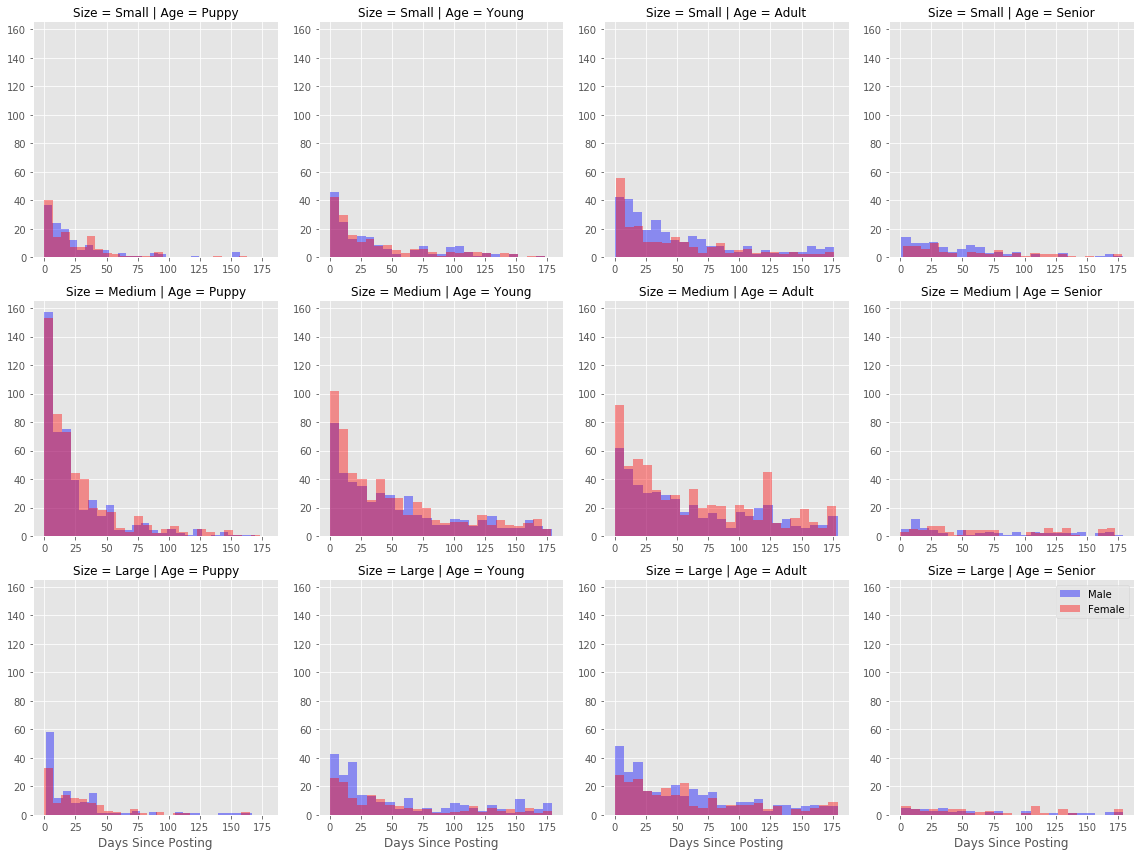

In [12]:
#Histograms of dogs by size, age, gender:

PostTime = sns.FacetGrid(pets[pets['DaysPosted'] < 180], col="Age", hue="Gender", row = "Size", \
                         palette=("blue","red"), size=4, row_order=("Small","Medium","Large"), \
                         col_order=("Puppy","Young","Adult","Senior"))
PostTime.map(sns.distplot, "DaysPosted", kde=False, bins = 24)
PostTime.set_xlabels("Days Since Posting") 
plt.legend()

#, xlabel = "Days Since Posting"   ? reverse x-axis?

In [13]:
# remember assumptions -- pets listed at same rate over past few months
# Can I calculate rate of adoption over 1st month?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

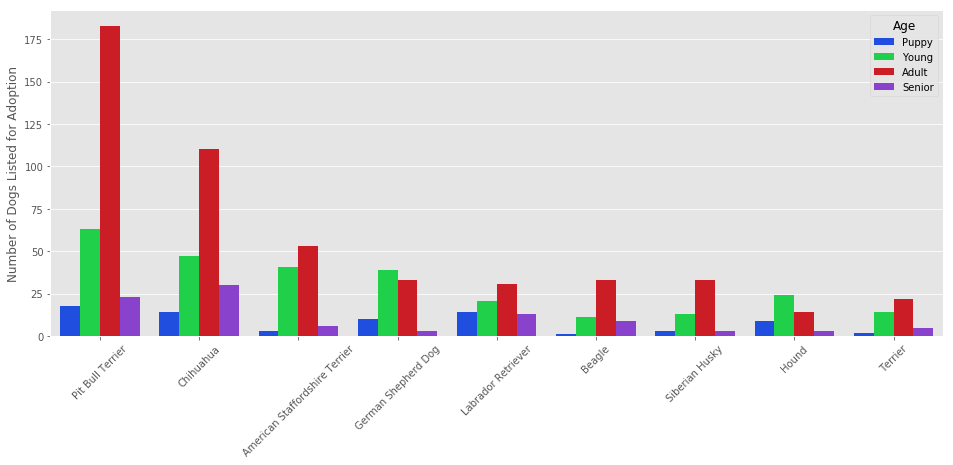

In [14]:
##Create bar plot of purebred dog breeds & number posted by age
#by location?

PureBreds = pets.loc[pets['PrimaryBreed'].isin(top_purebreds[0:9]) & pets['MixedBreed']==False]

plt.figure(figsize=(16,6))
g=sns.countplot(x ='PrimaryBreed',data=PureBreds, order=top_purebreds[0:9], \
              hue="Age", hue_order=("Puppy","Young","Adult","Senior"), palette = "bright")
g.set_xlabel("") 
g.set_ylabel("Number of Dogs Listed for Adoption")

plt.xticks(rotation=45)
#g.set_xticklabels(rotation=45)


In [15]:
PureBreds

,Name,Organization,Text,Gender,Age,Size,City,State,Zip,PublishDate,Coat,PrimaryBreed,SecondaryBreed,MixedBreed,GoodWith,Attributes,SpecialNeeds,AdoptionFee,DaysPosted
ID,,,,,,,,,,,,,,,,,,,
42313510,Calliope,SNARR Northeast,Calliope is a very seeet dog who was given up ...,Female,Adult,Large,White Plains,NY,10602,2018-07-28 00:09:16,Short,Bloodhound,NaN,False,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,NaN,9.0
42301355,Oreo,SNARR Northeast,Meet Oreo! This cutie pie is looking for the p...,Male,Young,Small,White Plains,NY,10602,2018-07-27 02:24:15,Medium,Shih Tzu,NaN,True,"['', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,375.0,10.0
42301336,B-52,SNARR Northeast,Meet darling B-52! This handsome lovebug is re...,Male,Puppy,Medium,White Plains,NY,10602,2018-07-27 02:00:45,Short,Border Collie,Boxer,True,"['Children', 'Other Dogs', '']","['Spay/Neuter', 'Shots Current']",NaN,450.0,10.0
42301298,Tanqueray and Tequila (bonded pair),SNARR Northeast,Tanqueray and Tequila are a cutie pie brother-...,Female,Adult,Medium,White Plains,NY,10602,2018-07-27 01:44:44,Short,Pomeranian,Beagle,True,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,300.0,10.0
42301255,Tanqueray and Tequila (bonded pair),SNARR Northeast,Tanqueray and Tequila are a cutie pie brother-...,Male,Adult,Medium,White Plains,NY,10602,2018-07-27 01:43:11,Short,Pug,English Bulldog,True,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,300.0,10.0
42300874,Sherry,SNARR Northeast,Please meet sweet little Sherry! This pretty g...,Female,Puppy,Medium,White Plains,NY,10602,2018-07-26 23:18:00,Medium,Border Collie,Retriever,True,"['Children', 'Other Dogs', '']","['Spay/Neuter', 'Shots Current']",NaN,450.0,11.0
42300858,Spritzer,SNARR Northeast,Sweet Spritzer is looking for a home to call h...,Male,Puppy,Medium,White Plains,NY,10602,2018-07-26 23:13:59,Medium,Border Collie,Retriever,True,"['Children', 'Other Dogs', '']","['Spay/Neuter', 'Shots Current']",NaN,450.0,11.0
42300812,Whistle,SNARR Northeast,Lovely Whistle is looking for a home of her ow...,Female,Young,Medium,White Plains,NY,10602,2018-07-26 23:04:09,Short,Husky,NaN,True,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,375.0,11.0
42300784,Cabo Wabo,SNARR Northeast,Adorable Cabo Wabo is looking for a home to ca...,Male,Young,Medium,White Plains,NY,10602,2018-07-26 22:55:49,Short,Greyhound,Labrador Retriever,True,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,375.0,11.0


In [16]:
#Create word clouds from listing text for popular dog breeds

import nltk

# Uncomment the following lines the first time you run the code
#nltk.download('stopwords')
#nltk.download('wordnet')

tbr = ['[removed]', '[deleted]']
from textblob import TextBlob
from wordcloud import WordCloud

In [24]:
PitbullTerrier=pets.loc[(pets['PrimaryBreed']=='Pit Bull Terrier') | (pets['SecondaryBreed']=='Pit Bull Terrier')]
Chihuahua=pets.loc[(pets['PrimaryBreed']=='Chihuahua') | (pets['SecondaryBreed']=='Chihuahua')]
LabradorRetriever=pets.loc[(pets['PrimaryBreed']=='Labrador Retriever') | (pets['SecondaryBreed']=='Labrador Retriever')]

Dachshund=pets.loc[(pets['PrimaryBreed']=='Dachshund') | (pets['SecondaryBreed']=='Dachshund')]


In [32]:
df = Dachshund
df.head(2)

,Name,Organization,Text,Gender,Age,Size,City,State,Zip,PublishDate,Coat,PrimaryBreed,SecondaryBreed,MixedBreed,GoodWith,Attributes,SpecialNeeds,AdoptionFee,DaysPosted
ID,,,,,,,,,,,,,,,,,,,
42084981,Kisha,SNARR Northeast,Adorable Kisha is looking for a home of her ow...,Female,Puppy,Small,White Plains,NY,10602,2018-07-04 03:03:28,Long,Dachshund,Chihuahua,True,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,450.0,33.0
41434579,Snickers,Paws Crossed Animal Rescue Inc.,"Snickers our little senior boy, just wants to ...",Male,Senior,Small,Elmsford,NY,10523,2018-04-18 22:06:39,NaN,Dachshund,NaN,True,"['', 'Other Dogs', 'Cats']","['Spay/Neuter', 'Shots Current']",NaN,NaN,110.0


In [34]:
df

,Name,Organization,Text,Gender,Age,Size,City,State,Zip,PublishDate,Coat,PrimaryBreed,SecondaryBreed,MixedBreed,GoodWith,Attributes,SpecialNeeds,AdoptionFee,DaysPosted
ID,,,,,,,,,,,,,,,,,,,
42084981,Kisha,SNARR Northeast,Adorable Kisha is looking for a home of her ow...,Female,Puppy,Small,White Plains,NY,10602,2018-07-04 03:03:28,Long,Dachshund,Chihuahua,True,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,450.0,33.0
41434579,Snickers,Paws Crossed Animal Rescue Inc.,"Snickers our little senior boy, just wants to ...",Male,Senior,Small,Elmsford,NY,10523,2018-04-18 22:06:39,NaN,Dachshund,NaN,True,"['', 'Other Dogs', 'Cats']","['Spay/Neuter', 'Shots Current']",NaN,NaN,110.0
42329731,Charlie Brown,Pet Rescue,"Charlie Brown is an adorable Dachshund mix, ab...",Male,Puppy,Small,Larchmont,NY,10538,2018-07-30 00:31:33,Short,Dachshund,NaN,True,"['Children', 'Other Dogs', '']","['House trained', 'Spay/Neuter', 'Shots Current']",NaN,NaN,7.0
42314359,Mike,Pet Rescue,Mike is a 16 week old lab/dachshund mix weighi...,Male,Puppy,Medium,Larchmont,NY,10538,2018-07-28 12:49:15,Short,Labrador Retriever,Dachshund,True,"['Children', 'Other Dogs', '']",[],NaN,NaN,9.0
41937748,Bubbles,Pet Rescue,"Bubbles is a sweet, outgoing, fun-loving girl,...",Female,Young,Small,Larchmont,NY,10538,2018-06-18 14:52:59,Short,Dachshund,NaN,True,"['', 'Other Dogs', '']","['Spay/Neuter', 'Shots Current']",NaN,NaN,49.0
39608209,Piff,Pet Rescue,"Piff (aka as Nellie in her foster home, is a s...",Female,Senior,Small,Larchmont,NY,10538,2017-10-10 00:49:43,Short,Dachshund,Chihuahua,True,"['', '', '']","['Spay/Neuter', 'Shots Current']",NaN,NaN,300.0
39541632,Edward,Pet Rescue,"Edward is a super sweet and adorable 12lb, app...",Male,Adult,Small,Larchmont,NY,10538,2017-10-02 13:49:26,Short,Dachshund,Terrier,True,"['', '', '']","['Spay/Neuter', 'Shots Current']",NaN,NaN,308.0
42373105,Pretty Boy,SPCA of Westchester,"When to Come:\nUnless noted differently above,...",Male,Adult,Small,Briarcliff Manor,NY,10510,2018-08-03 20:26:39,NaN,Dachshund,NaN,False,"['', '', '']","['Spay/Neuter', 'Shots Current']",NaN,NaN,3.0
34574697,Ollie,For the LOVE of DOGS,When Ollie first arrived to us about 2 years a...,Male,Young,Small,Ossining,NY,10562,2016-03-01 07:57:37,Medium,Dachshund,Chihuahua,True,"['', '', '']","['Spay/Neuter', 'Shots Current']",NaN,NaN,888.0


In [35]:
df['Text'] = df.loc[:,('Text')].fillna('')
#.loc[:,('one','second')]
#df['Text'] = df['Text'].apply(lambda x: '' if x in tbr else x)

/Users/Erin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].apply(lambda x: re.sub('http\S*', '', x))
df['Text'] = df['Text'].apply(lambda x: re.sub('\s+', ' ', x))
df = df.loc[df['Text'] != ""]
df['Text'] = df['Text'].apply(lambda x: re.sub('[^\w\s]','', x)) 


/Users/Erin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Erin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Erin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [40]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)
stop 
dogwords = ('dog','dogs','home','year','adoption','fee','years','old','fill','application','animal',\
            'alliance','im','hes','need','month')
stop.extend(dogwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [41]:
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

/Users/Erin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
from os import path
from PIL import Image
import os

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
dog_mask = np.array(Image.open(path.join(d, "dachshund-stencil_2.png")))


In [37]:
wc = WordCloud(background_color="white", max_words=2000, mask=dog_mask)
# generate word cloud
wc.generate(''.join(df['Text']))

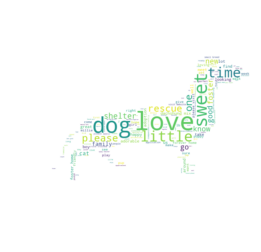

In [39]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(160,120))
plt.axis("off")
plt.show()